# Housing - 집  값 예측하기

* train.csv : 학습 데이터
    - id : 데이터 고유 id
    - OverallQual : 전반적 재료와 마감 품질
    - YearBuilt : 완공 연도
    - YearRemodAdd : 리모델링 연도
    - ExterQual : 외관 재료 품질
    - BsmtQual : 지하실 높이
    - TotalBsmtSF : 지하실 면적 
    - 1stFlrSF : 1층 면적 
    - GrLivArea : 지상층 생활 면적
    - FullBath : 지상층 화장실 개수 
    - KitchenQual : 부억 품질 
    - GarageYrBlt : 차고 완공 연도
    - GarageCars: 차고 자리 개수
    - GarageArea: 차고 면적 
    
    - target : 집값(달러 단위)
    
<br>

* test.csv
    - id : 데이터 고유 id
    - OverallQual : 전반적 재료와 마감 품질
    - YearBuilt : 완공 연도
    - YearRemodAdd : 리모델링 연도
    - ExterQual : 외관 재료 품질
    - BsmtQual : 지하실 높이
    - TotalBsmtSF : 지하실 면적 
    - 1stFlrSF : 1층 면적 
    - GrLivArea : 지상층 생활 면적
    - FullBath : 지상층 화장실 개수 
    - KitchenQual : 부억 품질 
    - GarageYrBlt : 차고 완공 연도
    - GarageCars: 차고 자리 개수
    - GarageArea: 차고 면적 

<br>

* sample_submission.csv 
    - id : 데이터 고유 id
    - target : 집값(달러 단위)

## Preparation

### Load Library

In [1]:
# utility
import os
from copy import deepcopy
import warnings

# data handling
import pandas as pd
import numpy as np
import missingno as msno

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import pingouin as pg

# modeling
import sklearn

### Global Setting

In [2]:
# plotting setting
from IPython.core.display import display, HTML
from IPython.display import Image
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

In [3]:
proj_dir=os.getcwd()
data_dir=(proj_dir +  '/data')

## Exploratory Data Analysis

### Load data

In [4]:
os.listdir(data_dir)

['test.csv', 'train.csv', 'sample_submission.csv']

In [5]:
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')

### Glimpse data

* 데이터의 크기
    * train set, instance 1350개, features 14개
    * test set, instance 1350개, features 14개

In [6]:
print('train set: ',df_train_raw.shape)
print('test set: ',df_test_raw.shape)

train set:  (1350, 15)
test set:  (1350, 14)


* 데이터의 형태

In [7]:
df_train_raw.head(3)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000


* 데이터의 유형

    <br>

    * Feature (14)
        * Categorical : Exter Qual, Kitchen Qual, Bsmt Qual, 
        * Numerical : id, Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Total Bsmt SF, 1st Flr SF, Full Bath, Year Built, Year Remod/Add, Garage Yr Blt
        
        <br>
        
    * Target
        * target, Numerical

In [8]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


### Check missing value

* Missing Value는 관찰되지 않는다.

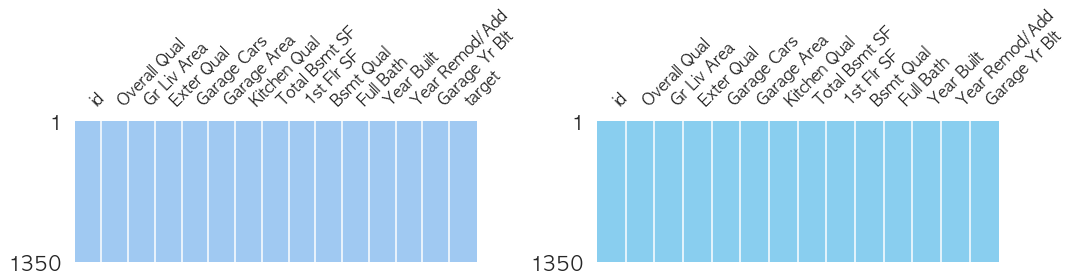

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
msno.matrix(df=df_train_raw, color=(0.63, 0.79, 0.95), ax=axes[0])
msno.matrix(df=df_test_raw, color=(0.54, 0.81, 0.94), ax=axes[1])
plt.tight_layout()
plt.show()

In [10]:
df_train_raw.isnull().sum()

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [11]:
df_test_raw.isnull().sum()

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

### Descriptic statistics

In [12]:
numerical = df_train_raw.columns[(df_train_raw.dtypes==int) | (df_train_raw.dtypes== float)]
categorical = df_train_raw.columns[df_train_raw.dtypes=='O']

In [13]:
categorical

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')

#### Check numerical features

In [14]:
len(numerical)

12

* 정보가가 있는지 여부, 분포의 형태(normal, binomial, skewness, kurtosis), Scale의 특성(ratio & interval) 등을 확인한다.

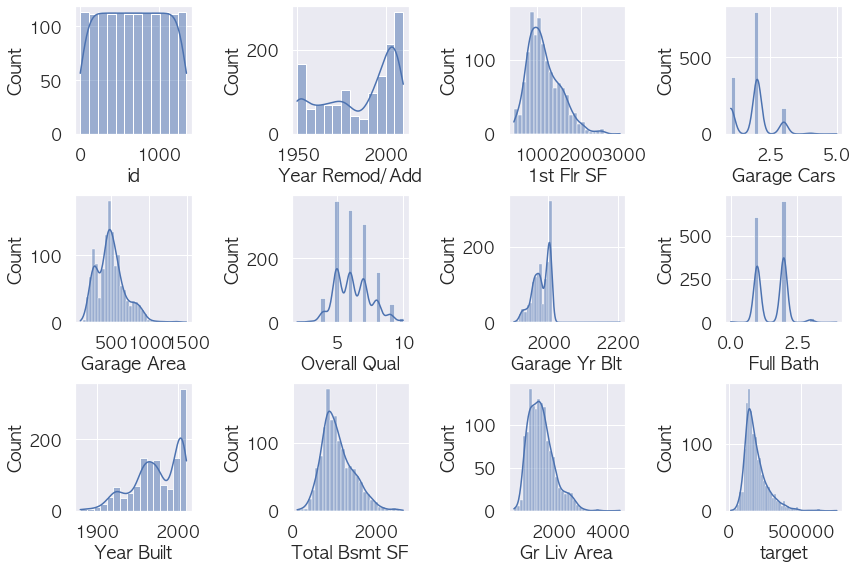

In [15]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(numerical):
    sns.histplot(data=df_train_raw[('%s' % name)], kde=True, 
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

* 각 Feature의 단위, Outlier의 존재 여부를 확인한다.

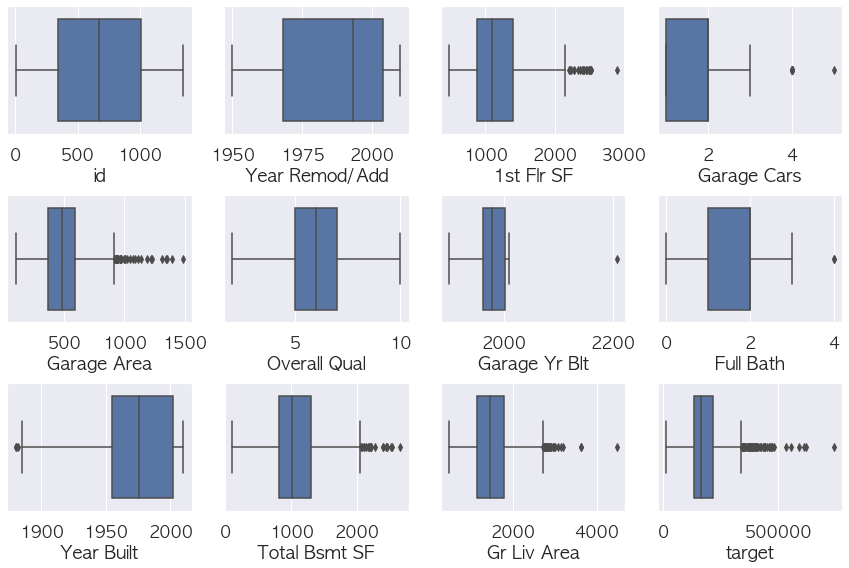

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(numerical):
    sns.boxplot(x=df_train_raw[('%s' % name)],
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

* 각 numerical feature들의 통계치를 확인한다.

In [17]:
summary = pd.DataFrame()
for idx, name in enumerate(numerical):
    tmp_df = pd.DataFrame({'Count_val':[df_train_raw[('%s' % name)].count()],
              'Count_Nan':[df_train_raw[('%s' % name)].isnull().sum()],
              'Mean':[df_train_raw[('%s' % name)].mean()],
              'Median':[df_train_raw[('%s' % name)].median()],
              #'Mode':[df_train_raw[('%s' % name)].mode()],
              'Std':[df_train_raw[('%s' % name)].std()],
              'Var':[df_train_raw[('%s' % name)].var()],
              'Min':[df_train_raw[('%s' % name)].min()],
              '25% Q':[df_train_raw[('%s' % name)].quantile(q=0.25, interpolation='linear')],
              '50% Q':[df_train_raw[('%s' % name)].quantile(q=0.5, interpolation='linear')],
              '75% Q':[df_train_raw[('%s' % name)].quantile(q=0.75, interpolation='linear')],
              'Max':[df_train_raw[('%s' % name)].max()],
              'Skewness':[df_train_raw[('%s' % name)].skew()],
              'Kurtosis':[df_train_raw[('%s' % name)].kurt()]}).T
    tmp_df.columns = [('%s' % name)]
    summary = pd.concat([summary, tmp_df], axis = 1)
summary.round(2)

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
Count_val,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1.350000e+03
Count_Nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
Mean,675.50,6.21,1513.54,1.87,502.01,1082.64,1167.47,1.56,1972.99,1985.10,1978.47,1.864063e+05
Median,675.50,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,1.653750e+05
Std,389.86,1.34,487.52,0.65,191.39,384.07,375.06,0.55,29.31,20.15,25.38,7.843542e+04
Var,151987.50,1.79,237678.91,0.43,36630.12,147508.01,140671.06,0.30,858.92,406.15,644.01,6.152116e+09
Min,1.00,2.00,480.00,1.00,100.00,105.00,480.00,0.00,1880.00,1950.00,1900.00,1.278900e+04
25% Q,338.25,5.00,1144.00,1.00,368.00,816.00,886.25,1.00,1955.00,1968.00,1961.00,1.350000e+05
50% Q,675.50,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,1.653750e+05
75% Q,1012.75,7.00,1774.50,2.00,588.00,1309.50,1396.50,2.00,2002.00,2004.00,2002.00,2.178750e+05


* ID feature를 제거한다.

In [18]:
numerical_targ = np.delete(numerical.values, np.where(numerical=='id'))

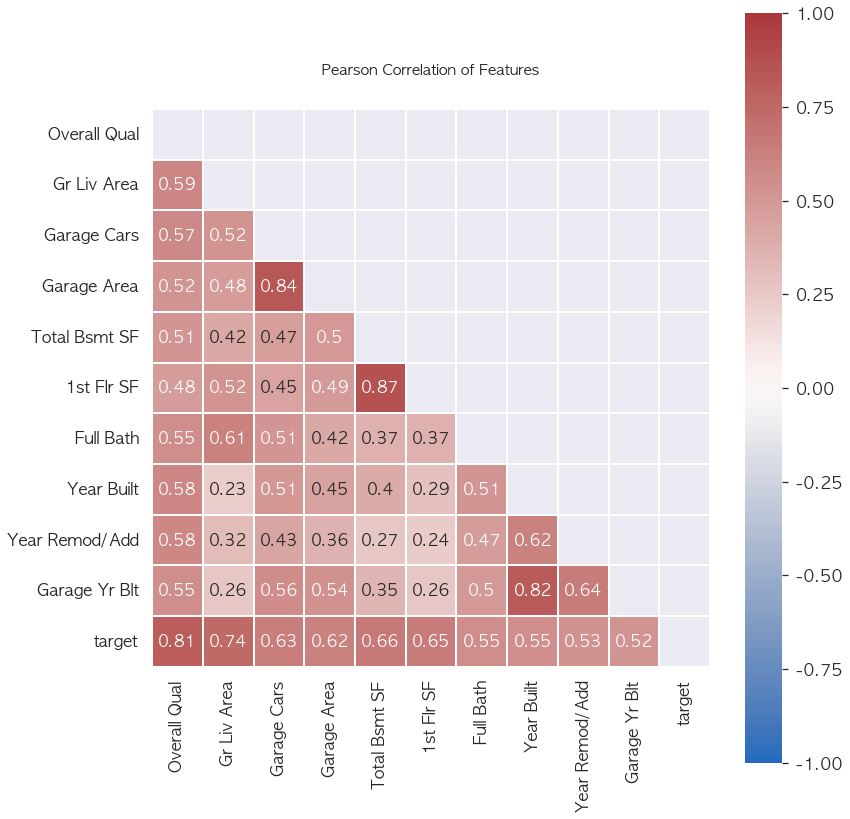

In [19]:
corr_matrix = df_train_raw[numerical_targ].corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
g1= sns.heatmap(corr_matrix,
                linewidths=0.1, vmax=1.0, vmin=-1.0, mask=mask,
                square=True, cmap= "vlag", linecolor='white', 
                annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

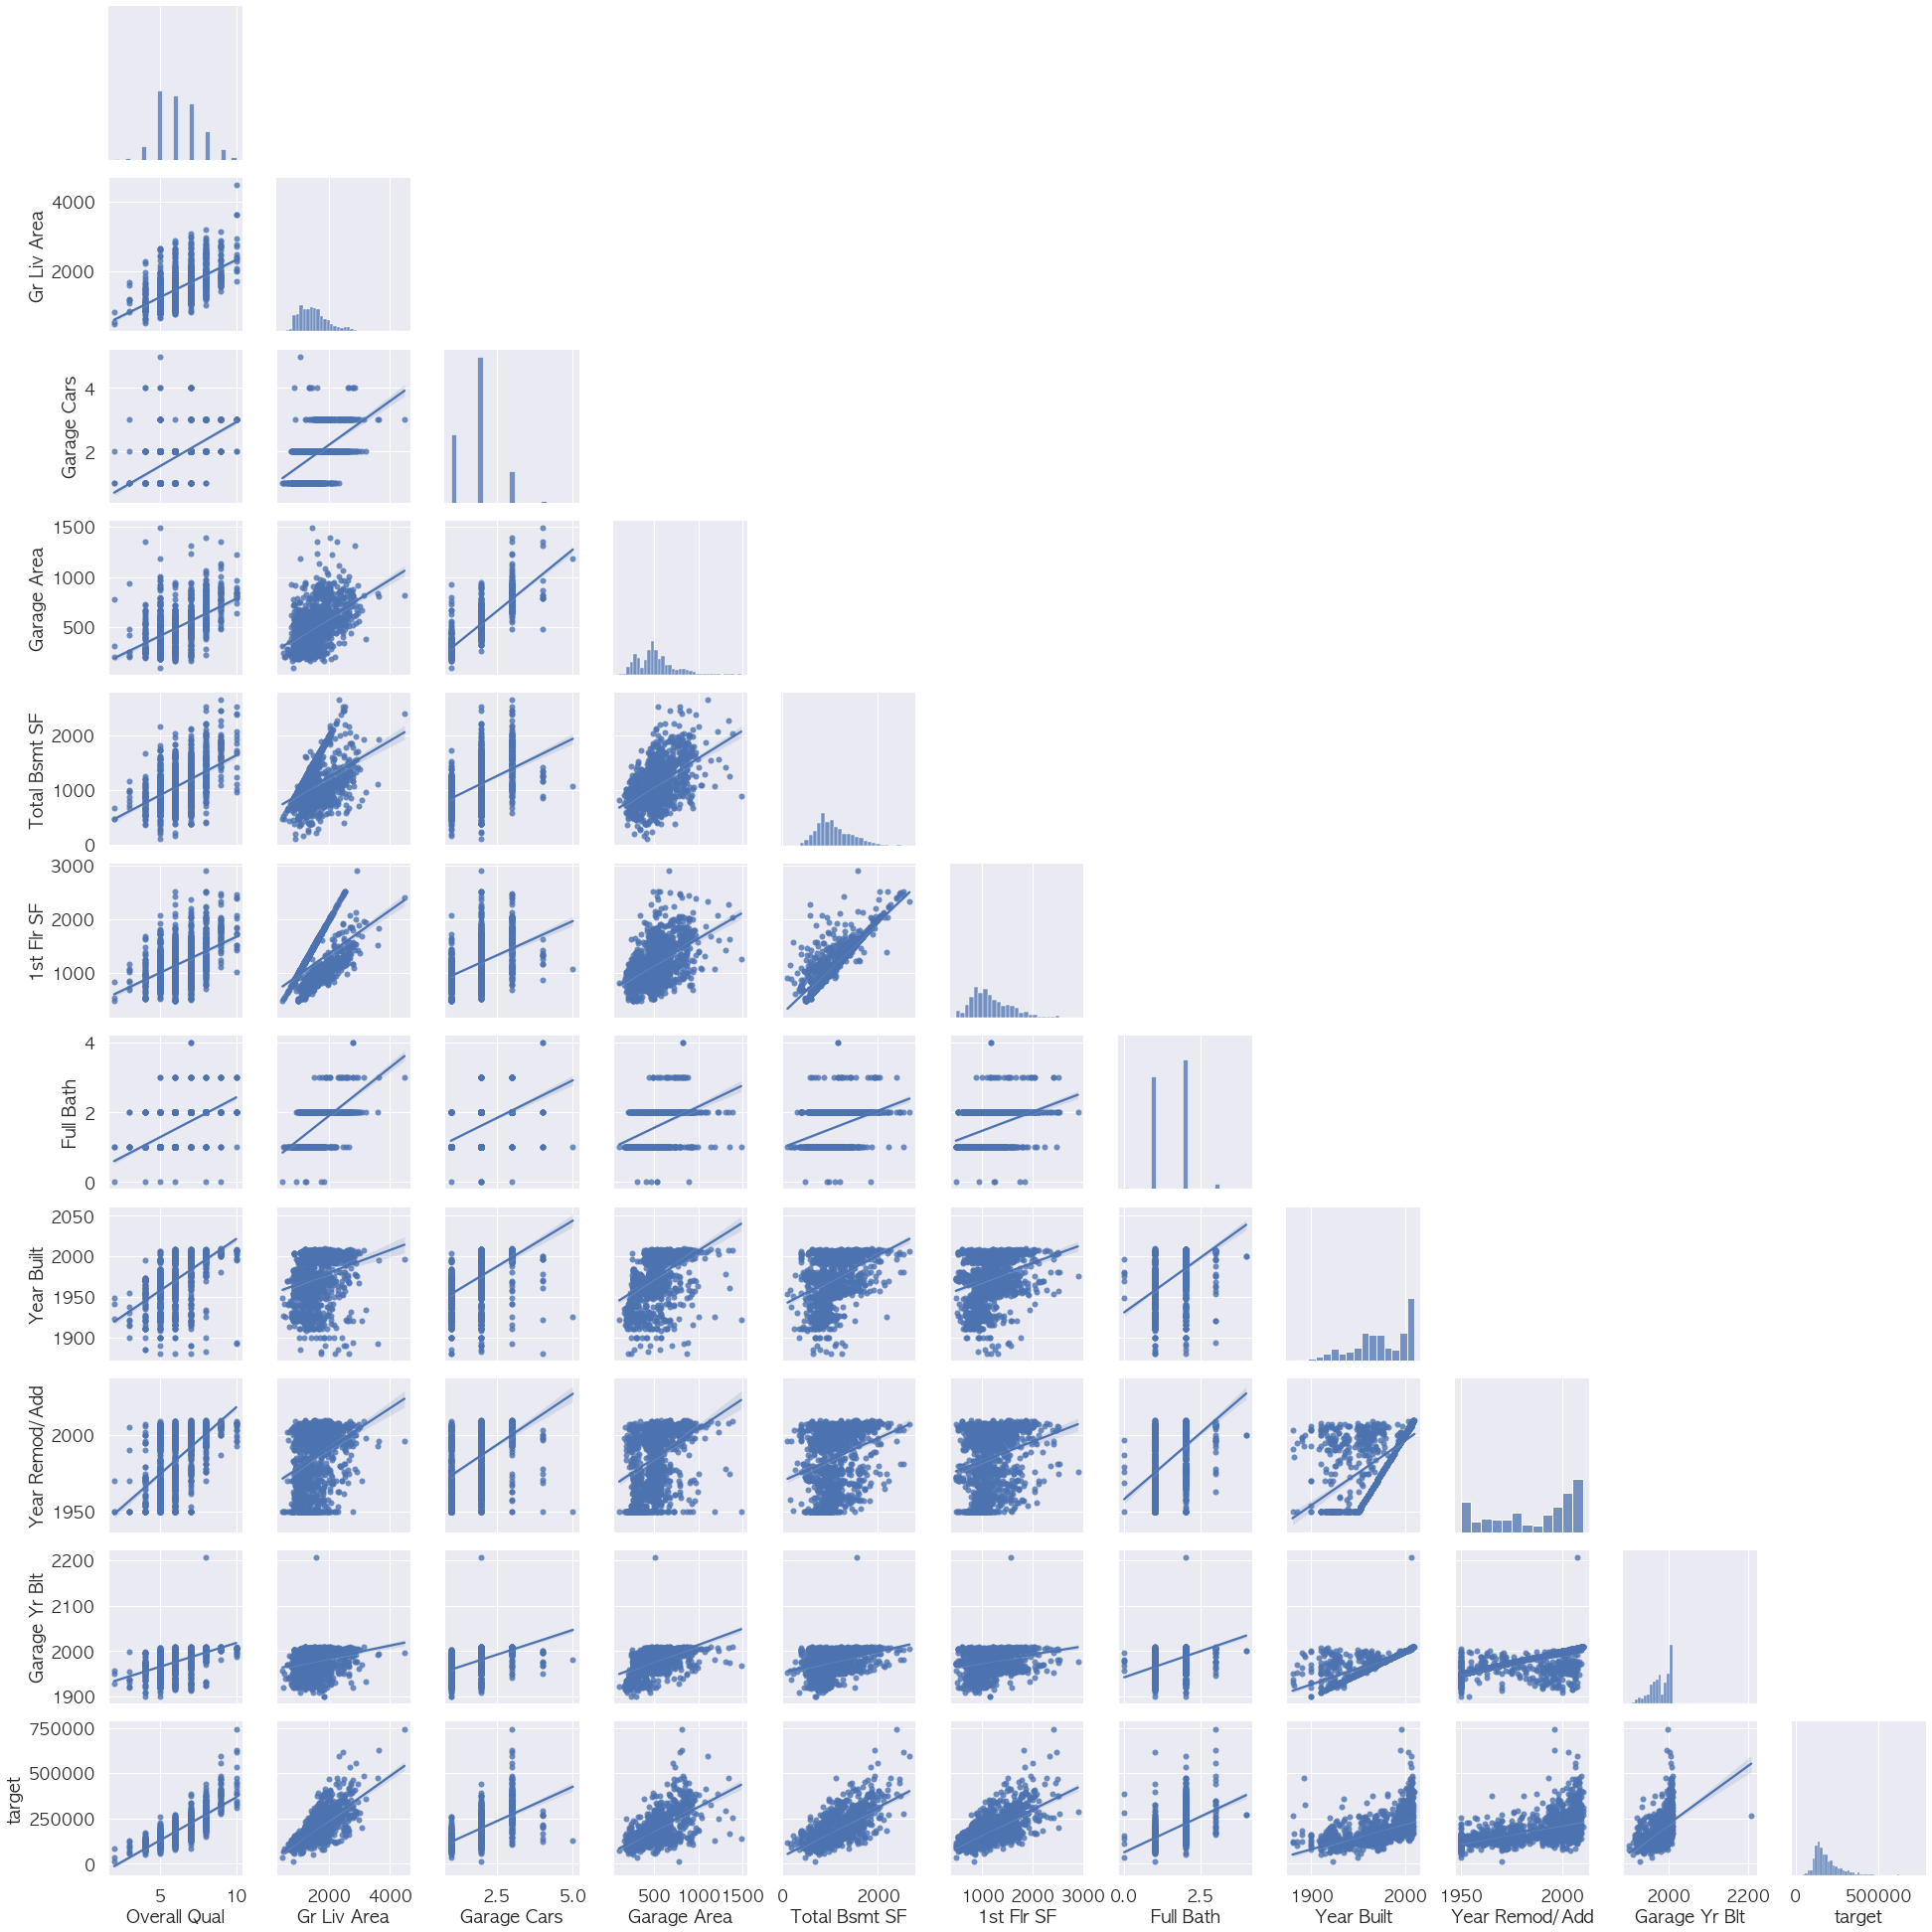

In [20]:
g1 = sns.pairplot(data=df_train_raw[numerical_targ], 
             kind = 'reg', corner=True)
plt.show()

* 상호 간 역상관을 보이는 Feature는 없다. 전반적으로 상호 간 상관이 높은 특성을 보인다. 
* Target과의 상관은 Overall Qual(전반적 재료와 마감 품질), Gr Liv Area(지상층 생활 면적), Total Bsmt SF(지하실 면적), 1st Flr SF(1층 면적), Garage Area(차고 면적)순으로 높다.
* Garage Area(차고 면적)와 Garage Cars(차고 자리 개수), 1st Flr Sf(1층 생활 면적)과 Total Bsmt Sf(지하실 면적), Garage Yr Blt(차고 완공 연도)와 Year Built(완공 연도)는 상호간 상관이 높다. 

#### Check categorical features

In [21]:
categorical_targ =  np.append(categorical.values, 'target')
categorical_targ

array(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'target'], dtype=object)

* 범주별 빈도를 확인한다.

In [22]:
new_idx = ['Ex','Fa','Gd','TA','Po']

In [23]:
for idx, name in enumerate(categorical):
    globals()['cdf_{}'.format(idx)] = pd.DataFrame((df_train_raw
              .filter([('%s' % name)])
              .value_counts(normalize=True)*100))
freq = pd.concat([cdf_0, cdf_1, cdf_2], axis = 1).reset_index() 
freq.columns = ['index', categorical[0], categorical[1], categorical[2]]
freq.set_index('index', inplace=True)
freq = freq.reindex(new_idx)
freq


,Exter Qual,Kitchen Qual,Bsmt Qual
index,,,
Ex,3.629630,7.925926,9.925926
Fa,0.592593,1.703704,2.074074
Gd,35.925926,41.481481,43.111111
TA,59.851852,48.888889,44.814815
Po,NaN,NaN,0.074074


* 범주별 target 요약치를 확인한다.

In [24]:
for idx, name in enumerate(categorical):
    globals()['sumdf_{}'.format(idx)] = (df_train_raw[[('%s' % name), 'target']]
         .groupby([('%s' % name)], as_index=True)
         .agg('mean'))
    
sumdf = pd.concat([sumdf_0, sumdf_1, sumdf_2], axis = 1)    
sumdf.columns = [categorical[0], categorical[1], categorical[2]]
sumdf = sumdf.reindex(new_idx)
sumdf

,Exter Qual,Kitchen Qual,Bsmt Qual
Ex,369636.122449,330451.149533,330505.186567
Fa,95092.875000,118493.173913,112046.785714
Gd,234161.577320,211360.892857,201927.286942
TA,147533.717822,144246.675758,143175.100826
Po,NaN,NaN,80900.000000


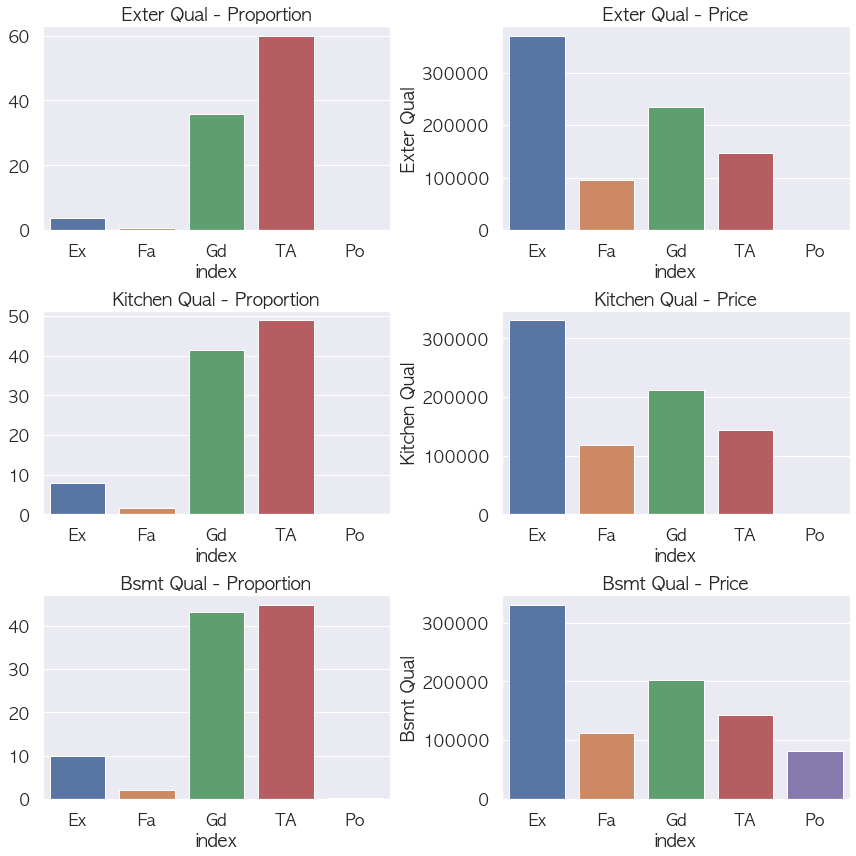

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for idx, name in enumerate(categorical):    
    sns.barplot(x = 'index', 
                y = ('%s' % name), 
                data = freq.reset_index(),
                ax=axes[idx,0])
    axes[idx,0].set_title(('%s - Proportion' % name))
    axes[idx,0].set_ylabel('')
    sns.barplot(x='index', y=('%s' % name),
                data=sumdf.reset_index(),
                ax=axes[idx,1])
    axes[idx,1].set_title(('%s - Price' % name))
plt.tight_layout()
plt.show()

* Exter Qual, Kitchen Qual, Bsmt Qual 간 상호 연관성 확인을 위해 Cramer's v를 계산한다. 

In [26]:
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix/notebook
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    chi2  = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    n = np.sum(crosstab) # Number of observations
    phi2 = chi2 / n 
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))    

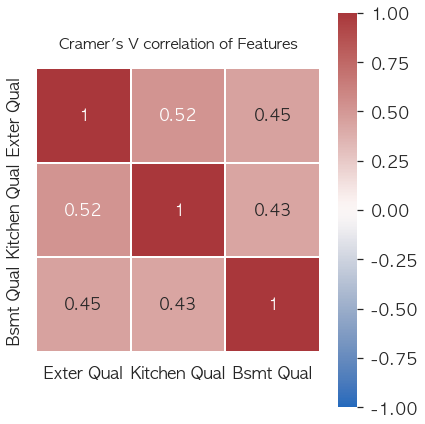

In [27]:
targ_data = df_train_raw[categorical]

rows= []
for var1 in targ_data:
    col = []
    for var2 in targ_data:
        cramers =cramers_V(targ_data[var1], targ_data[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
results_matrix = pd.DataFrame(cramers_results, columns = targ_data.columns, index = targ_data.columns)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.title("Cramer's V correlation of Features", y=1.05, size=15)
g1= sns.heatmap(results_matrix, linewidths=0.1, vmax=1.0, vmin=-1.0,
           square=True, cmap= "vlag", linecolor='white', annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

* Cramér's V는 두 범주,이산형 변수 간의 연관성의 크기 정도를 나타낸다. 
* V coefficienct는 항상 양수이며, 두 변수가 최대의 연관성을 가질때는 1, 아무런 연관성이 없을 때는 0 으로 계산된다.
* v ≤ 0.2 는 범주 간 연관성이 약한 경우, 0.2 < v ≤ 0.6는 범주 간 중간 수준의 연관성을 보이는 경우, v > 0.6는 범주 간 연관성이 강한 경우를 나타낸다.

### Summary

* id는 개별 instance를 구분짓기 위해 부여된 값으로 집값 예측에는 관련성이 없다.

<br>

* **Categorical**

    <br>

    * 품질 - Categorical
        * ExterQual(외관 재료 품질): categorical, 4개 범주를 가진다. 'Ex','Fa','Gd','TA'
        * KitchenQual (부억 품질): categorical, 4개 범주를 가진다. 'Ex','Fa','Gd','TA'
        * BsmtQual (지하실 높이): categorical, 5개 범주를 가진다. 'Ex','Fa','Gd','TA', 'Po'
        
            <br>
        
    * Exter, Kitchen, Bsmt Qual의 각 범주들은 서로 상이한 빈도, 상이한 가격을 보인다.
    * Exter, Kitchen, Bsmt Qual은 TA -> Gd -> Ex -> Fa -> Po 순으로 높은 빈도를 가지며 Ex -> GD -> TA -> FA -> Po 순으로 높은 가격을 가진다.
    * Exter & Kitchen은 0.52, Exter & Bsmt 는 0.45, Kitchen & Bsmt는 0.43 강도의 연관성을 가진다.
    
<br>

* **Numerical**

    <br>

    * **품질**
        * OverallQual(전반적 재료와 마감 품질): numerical, 2-10의 범위, 정수 단위로 분할된 특성을 보인다. target과 높은 상관을 보인다 (r = .81)
        
        <br>

    * **면적**
        * 1stFlrSF(1층 면적): continuous numerical, 480-2898, Outlier 확인, 좌측 편포, TotalBsmtSF와 강한 상관 (r = .87)
        * GrLivArea(지상층 생활 면적): continuous numerical, 480-4476, Outlier 확인, 좌측 편포, Full Bath와 moderate한 상관 (r = .61)
        * FullBath (지상층 화장실 개수): discrete numerical, 0-4, 양봉 분포, GrLivArea와 moderate 한 상관(r = .61)
        * TotalBsmtSF(지하실 면적): continuous numerical, 105-2660, 좌측 편포, Outlier 확인, 1stFlrSF와 강한 상관 (r = .87)
        * GarageCars: (차고 자리 개수): discrete numerical, 1-5, Outlier 확인, 좌측 편포 GarageArea와 강한 상관 (r = .84)
        * GarageArea: (차고 면적): numerical, 100-1488, 좌측 편포, GarageCars와 강한 상관 (r = .84)

    <br>

    * **완공/리모델링 연도**
        * YearBuilt(완공 연도): numerical, 1880 - 2010의 범위, Outlier 확인, 우측 편포, GarageYrBlt와 높은 상관 (r = .82)
        * YearRemodAdd(리모델링 연도): numerical, 1950-2010의 범위, Outlier 없음, 우측 편포.
        * GarageYrBlt : (차고 완공 연도): numerical, 1900-2207, Outlier 확인, 강한 우측 편포이나 Outlier에 의한 것으로 추정, YearBuilt와 높은 상관 (r = .82)
        
        <br>
        
    * Target과의 상관은 다음과 같다. 

In [28]:
pd.DataFrame(corr_matrix.target).T

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
target,0.810607,0.742061,0.634497,0.617151,0.664047,0.646843,0.554453,0.546037,0.529477,0.517973,1.0


## Preprocessing - Outliers

* 결측치와 이상치를 처리한다. 여기서 결측치는 관찰되지 않았으므로, 이상치를 일정 기준에 따라 처리한다.

In [29]:
df_train = df_train_raw.copy()

In [30]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results


def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-3SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

In [31]:
nF = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt']
cF = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
tF = ['target']

* Quantile 방법과 3SD 방법 각각에서 Outlier 판별 결과를 확인한다

In [32]:
tmp_df1 = outlier_value(df_train_raw[nF])
tmp_df2 = outlier_counts(df_train_raw[nF])
pd.concat([tmp_df1,tmp_df2], axis= 1)

,q_lower,q_upper,n_lower,n_upper,IQR*1.5,+-3SD
Overall Qual,2.000,10.000,2.194844,10.222934,0,3
Gr Liv Area,198.250,2720.250,50.972507,2976.111938,29,8
Garage Cars,-0.500,3.500,-0.087078,3.827819,12,12
Garage Area,38.000,918.000,-72.155054,1076.184684,36,11
Total Bsmt SF,75.750,2049.750,-69.558695,2234.847584,19,9
1st Flr SF,120.875,2161.875,42.289853,2292.658295,18,13
Full Bath,-0.500,3.500,-0.094198,3.215680,2,2
Year Built,1884.500,2072.500,1885.065635,2060.909180,4,6
Year Remod/Add,1914.000,2058.000,1924.639529,2045.558990,0,0
Garage Yr Blt,1899.500,2063.500,1902.340017,2054.603686,1,3


In [33]:
tmp_df2.sum()

IQR*1.5    121
+-3SD       67
dtype: int64

In [34]:
tmp_df1, tmp_df2 = outlier_mask(df_train_raw[nF])
drop_m1 = np.where(df_train_raw[nF][~tmp_df1].isnull())[0]
drop_m2 = np.where(df_train_raw[nF][~tmp_df2].isnull())[0]
print('IQR*1.5: ', len(np.unique(drop_m1)))
print('+3SD: ', len(np.unique(drop_m2)))

IQR*1.5:  90
+3SD:  49


* Outlier를 처리할 방법을 찾는다. 데이터가 많을 때, 가장 간단한 방법은 Outlier를 제거하는 것이다. 하지만 현재 Instance의 개수는 1350 밖에 안 되며, Test set에서도 Outlier가 관찰될 가능성이 있으므로, 되도록이면 값을 제거하기보다는 대체하는 방법을 사용한다. 
* 먼저 관찰된 Outlier가 현실적으로 가능한 값인지를 확인해본다.

In [35]:
tmp_df1, tmp_df2 = outlier_mask(df_train_raw[nF])

In [36]:
for idx, name in enumerate(nF):
    print(('%s :' % name), np.sort(pd.unique(df_train_raw[nF][tmp_df1].loc[:,('%s' % name)]))[::-1])

Overall Qual : [nan]
Gr Liv Area : [  nan 4476. 3627. 3608. 3194. 3140. 3082. 3005. 2978. 2956. 2945. 2898.
 2872. 2868. 2855. 2840. 2814. 2799. 2794. 2792. 2787. 2775. 2772. 2748.
 2730. 2728. 2727. 2726.]
Garage Cars : [nan  5.  4.]
Garage Area : [  nan 1488. 1390. 1356. 1348. 1314. 1231. 1220. 1184. 1138. 1110. 1085.
 1069. 1043. 1025. 1008. 1003.  995.  972.  968.  963.  962.  947.  944.
  938.  936.  928.  927.  925.  924.  923.]
Total Bsmt SF : [  nan 2660. 2535. 2524. 2461. 2458. 2452. 2396. 2392. 2271. 2220. 2217.
 2208. 2190. 2171. 2136. 2110. 2108. 2078. 2062.]
1st Flr SF : [  nan 2898. 2524. 2522. 2515. 2497. 2490. 2470. 2452. 2422. 2411. 2392.
 2362. 2338. 2279. 2276. 2234. 2217. 2207.]
Full Bath : [nan  4.]
Year Built : [  nan 1882. 1880.]
Year Remod/Add : [nan]
Garage Yr Blt : [  nan 2207.]


In [37]:
for idx, name in enumerate(nF):
    print(('%s :' % name), np.sort(pd.unique(df_train_raw[nF][tmp_df2].loc[:,('%s' % name)]))[::-1])

Overall Qual : [nan  2.]
Gr Liv Area : [  nan 4476. 3627. 3608. 3194. 3140. 3082. 3005. 2978.]
Garage Cars : [nan  5.  4.]
Garage Area : [  nan 1488. 1390. 1356. 1348. 1314. 1231. 1220. 1184. 1138. 1110. 1085.]
Total Bsmt SF : [  nan 2660. 2535. 2524. 2461. 2458. 2452. 2396. 2392. 2271.]
1st Flr SF : [  nan 2898. 2524. 2522. 2515. 2497. 2490. 2470. 2452. 2422. 2411. 2392.
 2362. 2338.]
Full Bath : [nan  4.]
Year Built : [  nan 1885. 1882. 1880.]
Year Remod/Add : [nan]
Garage Yr Blt : [  nan 2207. 1900.]


* 두 방법 모두에서 Garage Yr Blt에 현실적으로 불가능한 값이 관찰된다 (2207) 해당 값은 최대치, 최빈치나 중앙치로 대체한다.
* 처리 과정에서 연도 값의 최대값을 2020으로 간주하고, 2020을 초과하는 값을 대체하도록 하자.
* 다른 변수들의 값은 현실적으로 불가능한 값이 아니다. 이 값들은 모델에 포함하도록 한다.

In [38]:
def replace_outlier(df, columns, threshold):
    for i, j in enumerate(columns):
        tmp_df = df.copy()
        tmp_df[j][tmp_df[j] > threshold] = np.median(tmp_df[j])
        
    return tmp_df    

In [39]:
nF_year =['Year Built', 'Year Remod/Add', 'Garage Yr Blt'] 

In [40]:
df_train = replace_outlier(df_train_raw, nF_year, 2020)

* 결과를 확인하자

In [41]:
tmp_df1 = outlier_value(df_train[nF])
tmp_df2 = outlier_counts(df_train[nF])
pd.concat([tmp_df1,tmp_df2], axis= 1)

,q_lower,q_upper,n_lower,n_upper,IQR*1.5,+-3SD
Overall Qual,2.000,10.000,2.194844,10.222934,0,3
Gr Liv Area,198.250,2720.250,50.972507,2976.111938,29,8
Garage Cars,-0.500,3.500,-0.087078,3.827819,12,12
Garage Area,38.000,918.000,-72.155054,1076.184684,36,11
Total Bsmt SF,75.750,2049.750,-69.558695,2234.847584,19,9
1st Flr SF,120.875,2161.875,42.289853,2292.658295,18,13
Full Bath,-0.500,3.500,-0.094198,3.215680,2,2
Year Built,1884.500,2072.500,1885.065635,2060.909180,4,6
Year Remod/Add,1914.000,2058.000,1924.639529,2045.558990,0,0
Garage Yr Blt,1899.500,2063.500,1904.496274,2052.108911,0,2


## ML - Model Selection

* 이제 본격적으로 feature engineering, Model Prapration, Train & Validation, Testing의 과정을 거치며 최종 Test에 적합한 모델을 찾는다.
* Test Set의 정답을 알 수 없으므로, 현재 Train Set을 임시로 분할하여 모델링을 수행하고, 적합한 모델을 선택할 것이다. 

In [42]:
df_feature = df_train[nF+cF].copy()
df_label = df_train[tF].copy()

In [43]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

In [44]:
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((1080, 13), (270, 13), (1080, 1), (270, 1))

### Feature Engineering

* 앞선 분석에서 Numerical, Categorical 변수를 식별했다.
* Numerical 변수들은 서로 단위가 상이하다. 비현실적인 Outlier를 제거했으니 변수를 Scaling하여 단위를 통일해주자. Outlier가 일부 존재하므로 RobustScaler 기법을 활용한다.
* Categorical 변수들은 범주 4~5개로 구성된다. 이 변수들은 one-hot encoding으로 변환해준다. 

#### Scaling

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

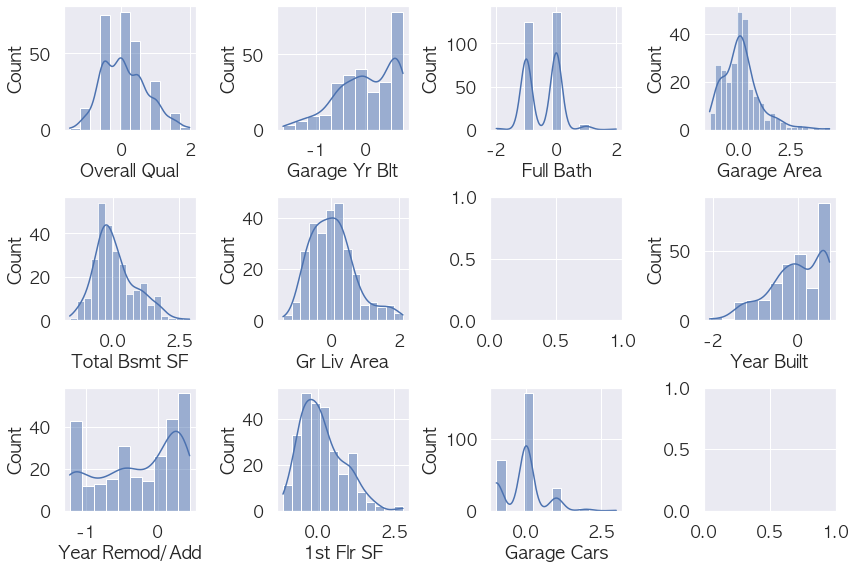

In [46]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(nF):
    sns.histplot(data=x_val[('%s' % name)], kde=True, 
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

#### One-hot Encoding

In [47]:
x_tr_dummy = pd.get_dummies(x_tr[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])
x_val_dummy = pd.get_dummies(x_val[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])

In [48]:
x_tr = pd.concat([x_tr[nF], x_tr_dummy], axis = 1)
x_val = pd.concat([x_val[nF], x_val_dummy], axis = 1)

In [49]:
x_tr.head(3)

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,...,EQual_Gd,EQual_TA,KQual_Ex,KQual_Fa,KQual_Gd,KQual_TA,BQual_Ex,BQual_Fa,BQual_Gd,BQual_TA
755,1.5,0.604278,1.0,1.267544,1.620533,1.474096,0.0,0.637363,0.305556,0.634146,...,1,0,0,0,1,0,1,0,0,0
109,-0.5,1.537815,0.0,-0.364035,0.225466,1.628543,0.0,-0.505495,0.222222,0.390244,...,1,0,0,0,0,1,0,0,0,1
1040,-0.5,-0.633308,-1.0,-0.864035,0.024157,-0.109482,-1.0,-0.351648,-0.972222,-0.463415,...,0,1,0,0,0,1,0,0,0,1


#### Feature Selection

* Feature Selection을 위해 Filter, Wrapper, Embedded 각각에서 대표적인 방법 하나씩을 선택한다.
* Filter 에서는 f_regression, Wrapper에서는 RFE, Embedded에서는 Lasso regression 을 수행한다.
* 간단한 linear model을 통해 Feature Selection 결과를 검토한다.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [51]:
help(mean_absolute_percentage_error)

Help on function mean_absolute_percentage_error in module sklearn.metrics._regression:

mean_absolute_percentage_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Mean absolute percentage error regression loss.
    
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    
    .. versionadded:: 0.24
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines

In [52]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [53]:
def NMAE(y_true, y_pred):
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))
    return loss

##### None

In [54]:
x_tr_fs = x_tr.copy()
x_val_fs = x_val.copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  1327005036.9591331 
MAE :  27080.685921420765 
NMAE :  target    0.147419
dtype: float64


In [55]:
fs_df = pd.DataFrame(['None', 'None', 
                      mean_squared_error(y_val_fs, y_pred_fs),
                      NMAE(y_val_fs, y_pred_fs)[0]]).T
fs_df.columns = ['Method', 'Type', 'MSE', 'NMAE']

##### Filter - f_regression

In [56]:
from sklearn.feature_selection import f_regression, SelectKBest
selector=SelectKBest(f_regression, k='all')
selector.fit(x_tr, y_tr)
threshold = 0.001

In [57]:
is_support = selector.pvalues_ < threshold
Results = pd.DataFrame({"Name":x_tr.columns,
              "F":selector.scores_,
              "p-value":selector.pvalues_,
              "Threshold": threshold,
              "Results": is_support})
Results

,Name,F,p-value,Threshold,Results
0,Overall Qual,2017.476318,3.611371e-249,0.001,True
1,Gr Liv Area,1363.093792,1.531887e-193,0.001,True
2,Garage Cars,807.010355,5.709760e-133,0.001,True
3,Garage Area,744.458248,4.639067e-125,0.001,True
4,Total Bsmt SF,845.116393,1.164322e-137,0.001,True
5,1st Flr SF,768.915654,3.481751e-128,0.001,True
6,Full Bath,516.004434,1.172924e-93,0.001,True
7,Year Built,431.567771,6.860970e-81,0.001,True
8,Year Remod/Add,417.650207,1.022421e-78,0.001,True
9,Garage Yr Blt,404.582236,1.171802e-76,0.001,True


* Threshold p-valu를 .001로 설정했을 때, Equal_FA를 제외한 모든 Feature가 살아남았다. 결과를 확인해본다. 

In [58]:
x_tr_fs = x_tr[x_tr.columns[is_support].values].copy()
x_val_fs = x_val[x_val.columns[is_support].values].copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  1213403229.1323473 
MAE :  26217.494975297563 
NMAE :  target    0.14272
dtype: float64


In [59]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'f_reg', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs)[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Wrapper - RFE

* 선택할 Feature의 수는 default로 절반을 선택한다.

In [60]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=0.5, step=1)
selector.fit(x_tr, y_tr)

RFE(estimator=LinearRegression(), n_features_to_select=0.5)

In [61]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":x_tr.columns,
              "Results": is_support})
Results

,Name,Results
0,Overall Qual,True
1,Gr Liv Area,True
2,Garage Cars,False
3,Garage Area,False
4,Total Bsmt SF,True
5,1st Flr SF,False
6,Full Bath,True
7,Year Built,True
8,Year Remod/Add,True
9,Garage Yr Blt,False


In [62]:
x_tr_fs = x_tr[x_tr.columns[is_support].values].copy()
x_val_fs = x_val[x_val.columns[is_support].values].copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  1125890911.4973748 
MAE :  24479.488149977467 
NMAE :  target    0.133259
dtype: float64


In [63]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'REF', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs)[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Embedded - Lasso

In [64]:
x_tr_fs = x_tr.copy()
x_val_fs = x_val.copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.1)
model.fit(x_tr_fs, y_tr_fs)

Lasso(alpha=0.1)

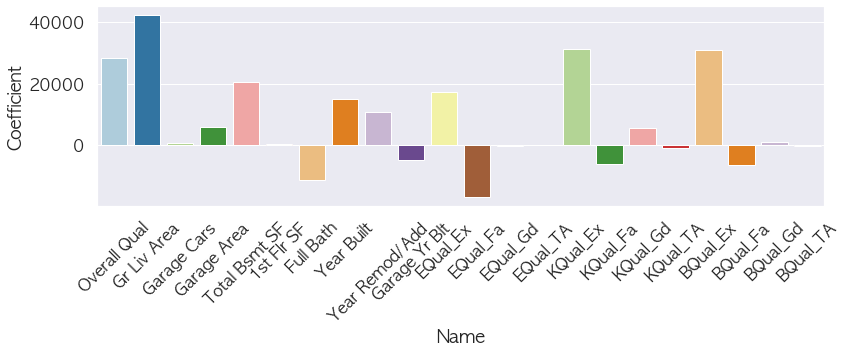

In [65]:
Results = pd.DataFrame({"Name":x_tr_fs.columns,
                        "Coefficient":model.coef_})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [66]:
y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs.target, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs.target, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs.reshape(-1,1))[0])


MSE :  1381129872.592018 
MAE :  27487.79092689375 
NMAE :  0.14963483971811867


In [67]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'Lasso', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs.reshape(-1,1))[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Feature Selection Results

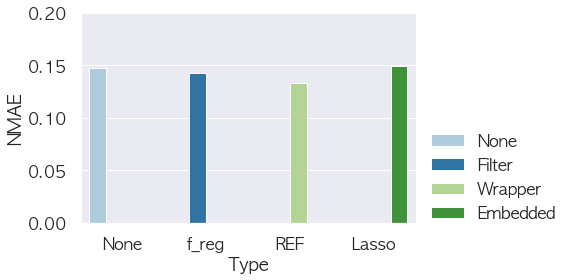

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
g1 = sns.barplot(data=fs_df, y='NMAE', x='Type', hue='Method', ax=ax, palette="Paired")
g1.legend(bbox_to_anchor=(1.0, 0.5))
g1.set(ylim=(0, 0.2))
plt.tight_layout()
plt.show()

* REF 방법이 가장 우수하다.

### ML Modeling

* 전처리된 데이터를 대상으로 ML 기법을 활용하여 모델을 구성해보자

In [69]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

#### Scaling & Encoding

In [70]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

x_tr_dummy = pd.get_dummies(x_tr[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])
x_val_dummy = pd.get_dummies(x_val[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])

x_tr = pd.concat([x_tr[nF], x_tr_dummy], axis = 1)
x_val = pd.concat([x_val[nF], x_val_dummy], axis = 1)

#### RFE feature selection

In [71]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=0.5, step=1)
selector.fit(x_tr, y_tr)
is_support = selector.get_support()

In [72]:
x_tr_fs = x_tr[x_tr.columns[is_support].values].copy()
x_val_fs = x_val[x_val.columns[is_support].values].copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

#### Model Selection

In [73]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, Lasso, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV


In [74]:
Linear = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
bRdige = BayesianRidge()
SVR = LinearSVR()
Tree = DecisionTreeRegressor()

Model_list = [Linear, Ridge, Lasso, bRdige, SVR, Tree]

In [75]:
def simple_fit(model, X_train, y_train):
    
    cv = KFold(n_splits = 5, random_state = 0, shuffle=True)
    cv_results = cross_validate(model, X_train, y_train, cv=cv) 
    cv_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    cv_mae = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    train_mse = mean_squared_error(y_train, y_pred)
    train_mae = mean_absolute_error(y_train, y_pred)
    train_nmae = NMAE(y_train, y_pred.reshape(-1,1))

    return cv_mse, cv_mae, train_mse, train_mae, train_nmae

In [76]:
ms_df = pd.DataFrame(columns=[
                     'Model', 't_MSE', 't_MAE', 't_NMAE'])

i = 0
for model in Model_list:
    i += 1

    cv_mse, cv_mae, train_mse, train_mae, train_nmae  = simple_fit(model, x_tr_fs, y_tr_fs)

    ms_tmp = {'Model': str(model),
              't_MSE': train_mse,
              't_MAE': train_mae,
              't_NMAE': train_nmae[0]}
    ms_df = ms_df.append(ms_tmp, ignore_index=True)
    

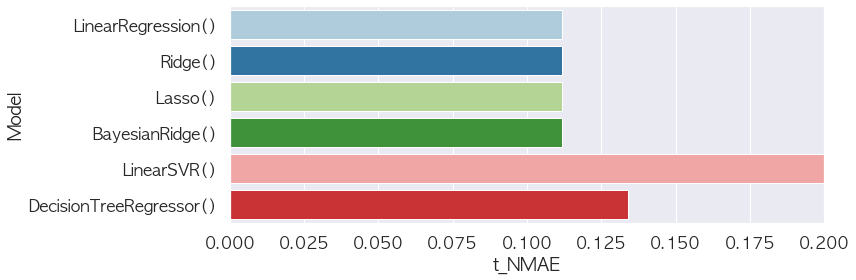

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
g1 = sns.barplot(data=ms_df, x='t_NMAE', y='Model',
                 ax=ax, palette="Paired")
g1.set(xlim=(0.0, 0.20))
plt.tight_layout()
plt.show()

* Ridge 또는 Bayesian Ridge를 선택하여 모델을 구성하자.

#### Hyper Parameter Tunning

In [78]:
# Hyper Parameter 
param_grid = {'alpha_init':[0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 10, 100],
              'lambda_init': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}

# grid search
grid_search = GridSearchCV(BayesianRidge(), param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)        

# finding best parameter
grid_search.fit(x_tr_fs, y_tr_fs)

GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_init': [0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                        1.9, 10, 100],
                         'lambda_init': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                         1e-06, 1e-09]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
print('Best Parameter :' , grid_search.best_params_)
print('Best Score :' , grid_search.best_score_)

Best Parameter : {'alpha_init': 0.01, 'lambda_init': 1e-05}
Best Score : -875510452.8821876


In [80]:
bestParam = list(grid_search.best_params_.items())
bestParam = pd.DataFrame(bestParam)
bestParam

,0,1
0,alpha_init,0.01000
1,lambda_init,0.00001


#### Model Training & Validation

In [81]:
fnl_model = BayesianRidge(alpha_init = 0.01, lambda_init = 0.00001)

In [82]:
fnl_model.fit(x_tr_fs, y_tr_fs)

cv = KFold(n_splits = 5, random_state = 0, shuffle=True)
cv_results = cross_validate(fnl_model, x_tr_fs, y_tr_fs,scoring='neg_mean_squared_error', cv=cv)

cv_mse = cross_val_score(fnl_model, x_tr_fs, y_tr_fs, scoring='neg_mean_squared_error', cv=cv)
cv_mae = cross_val_score(fnl_model, x_tr_fs, y_tr_fs, scoring='neg_mean_squared_error', cv=cv)
y_pred = cross_val_predict(model, x_tr_fs, y_tr_fs, cv=cv)

train_mse = mean_squared_error(y_tr_fs, y_pred)
train_mae = mean_absolute_error(y_tr_fs, y_pred)
train_nmae = NMAE(y_tr_fs, y_pred.reshape(-1,1))

print('train NAME : ', train_nmae[0])

train NAME :  0.13704141173874063


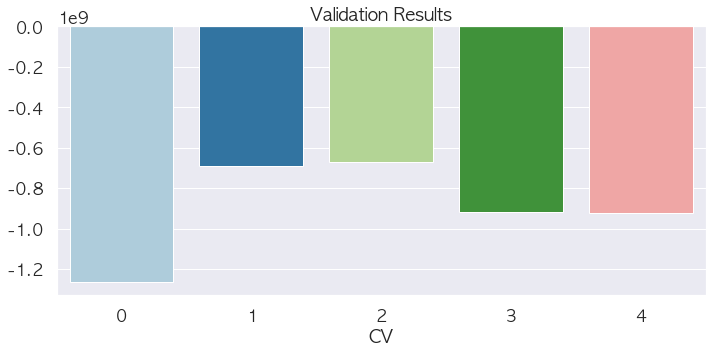

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
g1 = sns.barplot(x=list(range(len(cv_results['test_score']))), y=cv_results['test_score'], ax = ax, palette="Paired")
g1.set_xlabel('CV')
g1.set_title('Validation Results')
# g1.set(ylim=(0.70, 1.00))
plt.tight_layout()
plt.show()

In [84]:
from sklearn.model_selection import permutation_test_score
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    fnl_model, x_tr_fs, y_tr_fs, scoring="neg_root_mean_squared_error", cv=cv, n_permutations=100)

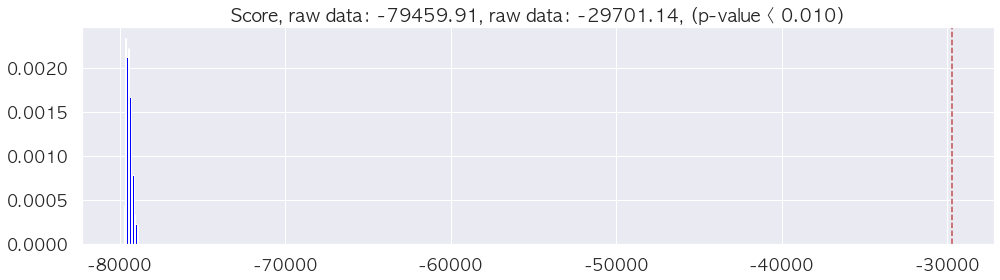

In [85]:
plt.subplots(figsize=(14, 4))
plt.hist(perm_scores_act, density=True, color='blue')
plt.axvline(score_act, ls="--", color="r")
score_label = f"Score, raw data: {np.mean(perm_scores_act):.2f}, raw data: {score_act:.2f}, (p-value < {pvalue_act:.3f})"
plt.title(score_label)
plt.tight_layout()
plt.show()

#### Prediction

In [86]:
y_val_pred = fnl_model.predict(x_val_fs)

test_mse = mean_squared_error(y_val_fs, y_val_pred)
test_mae = mean_absolute_error(y_val_fs, y_val_pred)
test_nmae = NMAE(y_val_fs, y_val_pred.reshape(-1,1))

print('train NAME : ', train_nmae[0])
print('test NAME : ', test_nmae[0])

train NAME :  0.13704141173874063
test NAME :  0.12899860904385105


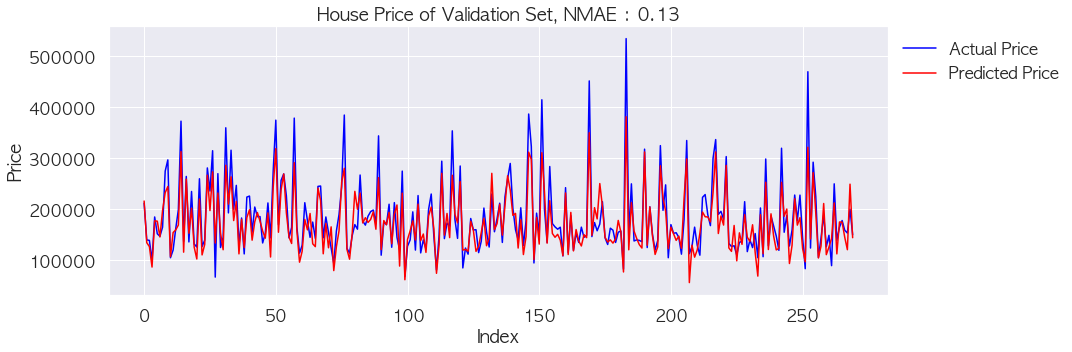

In [87]:
predicted = pd.concat([y_val_fs.reset_index(drop=True), 
                       pd.DataFrame(y_val_pred, columns=['pred'])], 
                      axis=1, ignore_index=True)
predicted.columns = ['Actual Price', 'Predicted Price']

plt.figure(figsize=[15,5])
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Actual Price', color='blue')
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Predicted Price', color='red')
g1.set_ylabel('Price')
g1.set_xlabel('Index')
g1.set_title('House Price of Validation Set, NMAE : %.2f' % (test_nmae[0]))
g1.legend(['Actual Price', 'Predicted Price'], 
          bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [88]:
import pingouin as pg
pg.corr(predicted['Actual Price'], predicted['Predicted Price'],
        alternative="two-sided",
        method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,270,0.918106,"[0.9, 0.94]",1.011571e-109,6.361e+105,1.0


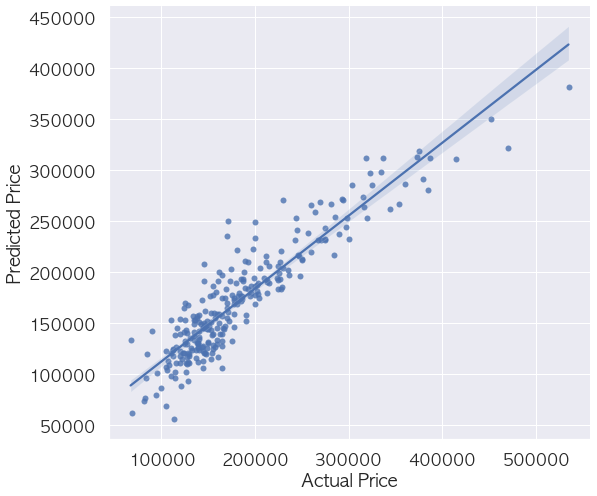

In [89]:
g = sns.lmplot(x='Actual Price', y='Predicted Price', data=predicted, height=7, aspect=1.2);
g.set_axis_labels("Actual Price", "Predicted Price")
plt.tight_layout()
plt.show()

## DL - modeling

* 전처리된 데이터를 대상으로 DL 기법을 활용하여 모델을 구성해보자

In [90]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

### Scaling & Encoding

In [91]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

x_tr_dummy = pd.get_dummies(x_tr[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])
x_val_dummy = pd.get_dummies(x_val[cF], 
                         columns=cF, 
                         prefix=['EQual', 'KQual','BQual'])

x_tr = pd.concat([x_tr[nF], x_tr_dummy], axis = 1)
x_val = pd.concat([x_val[nF], x_val_dummy], axis = 1)

In [92]:
x_tr_dl = x_tr.copy()
y_tr_dl = y_tr.copy()
x_val_dl = x_val.copy()
y_val_dl = y_val.copy()

x_tr_dl = np.array(x_tr_dl, dtype=np.float32)
y_tr_dl = np.array(y_tr_dl, dtype=np.float32)
x_val_dl = np.array(x_val_dl, dtype=np.float32)
y_val_dl = np.array(y_val_dl, dtype=np.float32)


### Model Specification

In [93]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [94]:
dl_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_tr_dl.shape[1:]),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(150, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(l2=0.001)), 
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear'),
])

Metal device set to: Apple M1


2022-01-25 17:14:45.768991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-25 17:14:45.769090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [95]:
dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
                loss='mape', metrics='mape')
# dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
#                 loss=custom_NMAE, metrics=custom_NMAE)



dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4600      
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                        

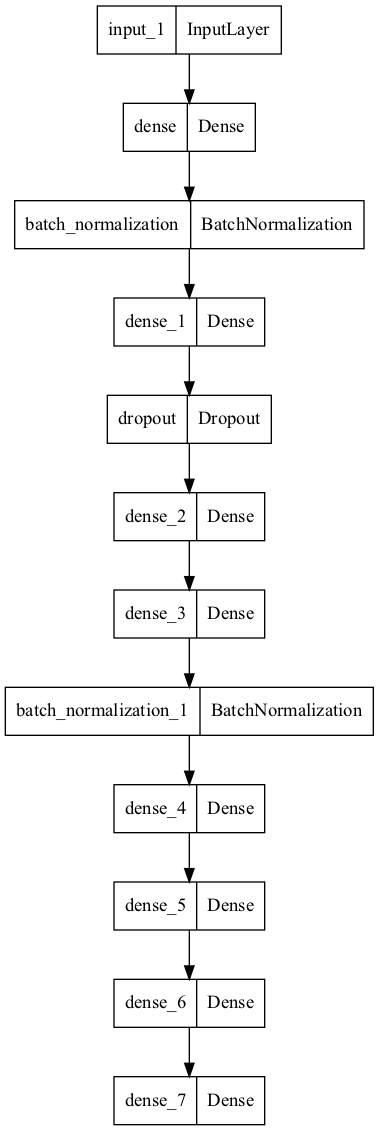

In [96]:
plot_model(dl_model)

In [97]:
# define callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ckp_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs')

### Model Fitting

In [98]:
history = dl_model.fit(x_tr_dl, y_tr_dl.flatten(), epochs=500, 
                    validation_split=0.2, batch_size=16,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

2022-01-25 17:14:46.115733: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/500


2022-01-25 17:14:46.384716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - ETA: 0s - loss: 100.7407 - mape: 99.9866

2022-01-25 17:14:47.279111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 14ms/step - loss: 100.7407 - mape: 99.9866 - val_loss: 100.4633 - val_mape: 99.9824
Epoch 2/500
54/54 [==============================] - 1s 11ms/step - loss: 99.6625 - mape: 99.2871 - val_loss: 99.1242 - val_mape: 98.7744
Epoch 3/500
54/54 [==============================] - 1s 12ms/step - loss: 91.3751 - mape: 90.9094 - val_loss: 86.1489 - val_mape: 85.5013
Epoch 4/500
54/54 [==============================] - 1s 12ms/step - loss: 60.2968 - mape: 59.3879 - val_loss: 49.7877 - val_mape: 48.6456
Epoch 5/500
54/54 [==============================] - 1s 12ms/step - loss: 34.0213 - mape: 32.7333 - val_loss: 27.2363 - val_mape: 25.7977
Epoch 6/500
54/54 [==============================] - 1s 11ms/step - loss: 26.2229 - mape: 24.7477 - val_loss: 23.8514 - val_mape: 22.3340
Epoch 7/500
54/54 [==============================] - 1s 11ms/step - loss: 23.9552 - mape: 22.4479 - val_loss: 19.8188 - val_mape: 18.3363
Epoch 8/500
54/54 [=========================

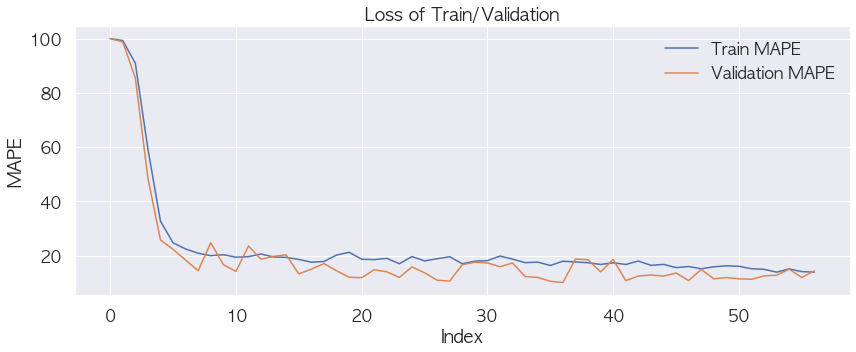

In [99]:
def plot_loss(history):
    df = pd.DataFrame(history.history).filter(['mape','val_mape'])
    plt.subplots(figsize=[12,5])
    g1=sns.lineplot(x=df.index.values, y=df.mape)
    g1=sns.lineplot(x=df.index.values, y=df.val_mape)    
    g1.set_ylabel('MAPE')
    g1.set_xlabel('Index')
    g1.set_title('Loss of Train/Validation')
    g1.legend(['Train MAPE', 'Validation MAPE'], 
          bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()
    
plot_loss(history)


### Prediction

In [100]:
t_loss, t_mse = dl_model.evaluate(x_val_dl,  y_val_dl, )
y_val_pred_dl = dl_model.predict(x_val_dl)

9/9 [==============================] - 0s 7ms/step - loss: 18.2003 - mape: 16.8515


2022-01-25 17:15:19.449223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-25 17:15:19.651200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


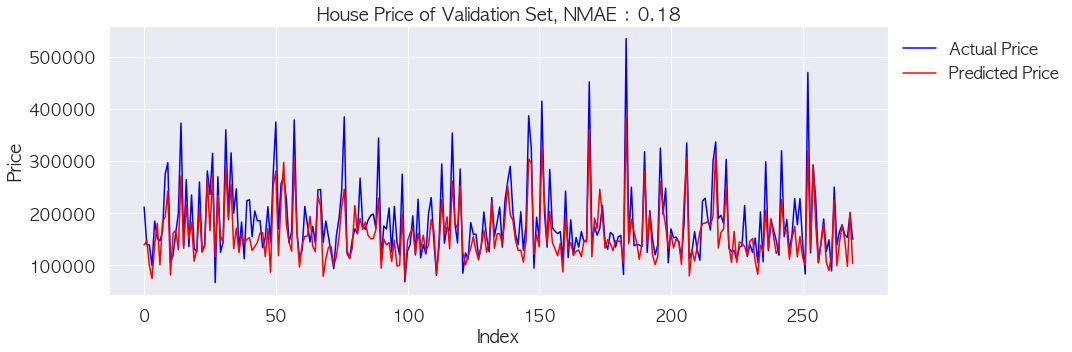

In [101]:
predicted = pd.concat([pd.DataFrame(y_val_dl, columns = ['Actual Price']), 
                       pd.DataFrame(y_val_pred_dl, columns = ['Predicted Price'])], 
                      axis=1, ignore_index=False)
#predicted.columns = ['Actual Price', 'Predicted Price']

plt.figure(figsize=[15,5])
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Actual Price', color='blue')
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Predicted Price', color='red')
g1.set_ylabel('Price')
g1.set_xlabel('Index')
g1.set_title('House Price of Validation Set, NMAE : %.2f' % (NMAE(y_val_dl, y_val_pred_dl)))
g1.legend(['Actual Price', 'Predicted Price'], 
          bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [102]:
import pingouin as pg
pg.corr(predicted['Actual Price'], predicted['Predicted Price'],
        alternative="two-sided",
        method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,270,0.881387,"[0.85, 0.91]",2.854609e-89,3.331e+85,1.0


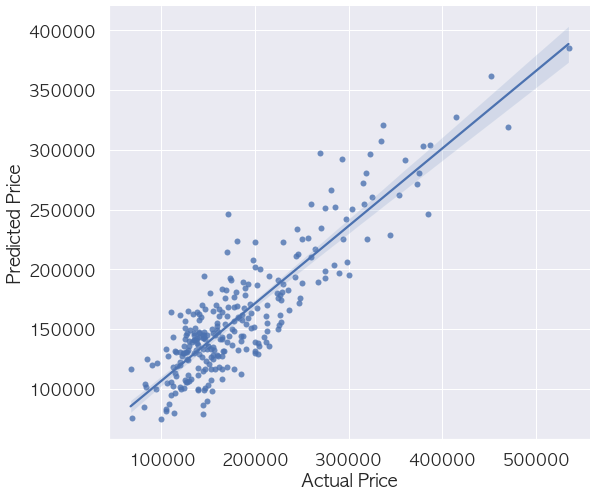

In [103]:
g = sns.lmplot(x='Actual Price', y='Predicted Price', data=predicted, height=7, aspect=1.2);
g.set_axis_labels("Actual Price", "Predicted Price")
plt.tight_layout()
plt.show()

## Model Evaluation

* ML model과 DL model을 비교한 결과는 다음과 같다.

In [137]:
model_results=pd.DataFrame()
ml = pd.DataFrame({"Method" : ['ML'], 
      "Model" : ['BayesRidge'], 
      "NMAE" : NMAE(np.array(y_val_fs).flatten(), y_val_pred)})
dl = pd.DataFrame({'Method' : ['DL'], 
      'Model' : ['Dense'], 
      'NMAE' : NMAE(y_val_dl, y_val_pred_dl)})
res = pd.concat([ml,dl]).reset_index(drop=True)
res

,Method,Model,NMAE
0,ML,BayesRidge,0.128999
1,DL,Dense,0.176700


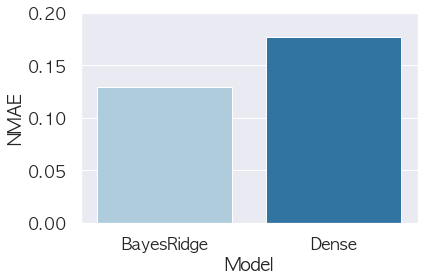

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
g1 = sns.barplot(data=res, y='NMAE', x='Model', ax=ax, palette="Paired")
g1.set(ylim=(0, 0.2))
plt.tight_layout()
plt.show()

* Data 수 부족, 정교한 Model Specification 부족으로 DL 모델이 ML 모델보다 낮은 성능을 보인다.
* 최종 테스트는 ML - BayesianRidge로 수행한다.

## Final Modeling

### Setting

In [236]:
# utility
import os
from copy import deepcopy
import warnings

# data handling
import pandas as pd
import numpy as np
import missingno as msno

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import pingouin as pg

# modeling
import sklearn
from sklearn.metrics import make_scorer

In [206]:
# plotting setting
from IPython.core.display import display, HTML
from IPython.display import Image
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

proj_dir=os.getcwd()
data_dir=(proj_dir +  '/data')

In [207]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results

def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-3SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

def replace_outlier(df, columns, threshold):
    for i, j in enumerate(columns):
        tmp_df = df.copy()
        tmp_df[j][tmp_df[j] > threshold] = np.median(tmp_df[j])
        
    return tmp_df   

In [319]:
def custom_NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return -loss

def NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return loss

### Data Preparation

In [238]:
os.listdir(data_dir)
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')

In [239]:
ID = ['id']
nF = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt']
cF = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
tF = ['target']

In [240]:
df_train = df_train_raw[nF+cF].copy()
df_label = df_train_raw[tF].copy()
df_test = df_test_raw[nF+cF].copy()

### Preprocessing & Feature Engineering

#### Outliers

In [287]:
nF_year =['Year Built', 'Year Remod/Add', 'Garage Yr Blt'] 
df_train = replace_outlier(df_train, nF_year, 2020)
df_test = replace_outlier(df_test, nF_year, 2020)

In [288]:
for idx, name in enumerate(categorical):
    globals()['cdf_{}'.format(idx)] = pd.DataFrame((df_test[cF]
              .filter([('%s' % name)])
              .value_counts()))
freq = pd.concat([cdf_0, cdf_1, cdf_2], axis = 1).reset_index() 
freq.columns = ['index', categorical[0], categorical[1], categorical[2]]
freq.set_index('index', inplace=True)
freq = freq.reindex(new_idx)
freq


,Exter Qual,Kitchen Qual,Bsmt Qual
index,,,
Ex,58.0,94,124
Fa,9.0,23,46
Gd,489.0,566,597
TA,794.0,666,582
Po,NaN,1,1


* Test Set의 Kitchen Qual에는 Po가 존재한다. Training Set에서 Po칸을 만들어주자.

#### Scaling & Encoding

In [289]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_nF = scaler.fit_transform(df_train[nF])
x_train_nF = pd.DataFrame(x_train_nF)
x_train_nF.columns = nF
x_test_nF = scaler.transform(df_test[nF])
x_test_nF = pd.DataFrame(x_test_nF)
x_test_nF.columns = nF

x_train_cF = pd.get_dummies(df_train[cF], 
                            columns=cF, 
                            prefix=['EQual', 'KQual','BQual'])
x_train_cF['KQual_Po'] = 0
x_test_cF = pd.get_dummies(df_test[cF], 
                            columns=cF, 
                            prefix=['EQual', 'KQual','BQual'])

x_train = pd.concat([x_train_nF, x_train_cF], axis = 1)
x_test = pd.concat([x_test_nF, x_test_cF], axis = 1)

In [290]:
print(x_train_cF.head(2))
print('\n\n')
print(x_test_cF.head(2))

   EQual_Ex  EQual_Fa  EQual_Gd  EQual_TA  KQual_Ex  KQual_Fa  KQual_Gd  \
0         1         0         0         0         1         0         0   
1         0         0         1         0         0         0         1   

   KQual_TA  BQual_Ex  BQual_Fa  BQual_Gd  BQual_Po  BQual_TA  KQual_Po  
0         0         1         0         0         0         0         0  
1         0         1         0         0         0         0         0  



   EQual_Ex  EQual_Fa  EQual_Gd  EQual_TA  KQual_Ex  KQual_Fa  KQual_Gd  \
0         0         0         1         0         1         0         0   
1         0         0         0         1         0         0         0   

   KQual_Po  KQual_TA  BQual_Ex  BQual_Fa  BQual_Gd  BQual_Po  BQual_TA  
0         0         0         1         0         0         0         0  
1         0         1         0         0         0         0         1  


In [291]:
x_train = x_train[x_test.columns.values]

In [292]:
print(x_train.columns)
print('\n\n')
print(x_test.columns)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'EQual_Ex', 'EQual_Fa', 'EQual_Gd',
       'EQual_TA', 'KQual_Ex', 'KQual_Fa', 'KQual_Gd', 'KQual_Po', 'KQual_TA',
       'BQual_Ex', 'BQual_Fa', 'BQual_Gd', 'BQual_Po', 'BQual_TA'],
      dtype='object')



Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'EQual_Ex', 'EQual_Fa', 'EQual_Gd',
       'EQual_TA', 'KQual_Ex', 'KQual_Fa', 'KQual_Gd', 'KQual_Po', 'KQual_TA',
       'BQual_Ex', 'BQual_Fa', 'BQual_Gd', 'BQual_Po', 'BQual_TA'],
      dtype='object')


#### Feature Selection

In [293]:
y_train = df_label.copy()

In [294]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=0.5, step=1)
selector.fit(x_train , y_train)
is_support = selector.get_support()

In [295]:
pd.DataFrame({"Name":x_train.columns,
          "Results": is_support})

,Name,Results
0,Overall Qual,True
1,Gr Liv Area,True
2,Garage Cars,False
3,Garage Area,False
4,Total Bsmt SF,True
5,1st Flr SF,False
6,Full Bath,True
7,Year Built,True
8,Year Remod/Add,True
9,Garage Yr Blt,False


In [296]:
x_train_fs = x_train[x_train.columns[is_support].values].copy()
x_test_fs = x_test[x_test.columns[is_support].values].copy()

In [302]:
x_train_fs.shape, y_train.shape, x_test_fs.shape

((1350, 12), (1350,), (1350, 12))

#### Modeling

In [298]:
x_train_fs = np.array(x_train_fs)
y_train = np.array(y_train).flatten()
x_test_fs = np.array(x_test_fs)

##### Hyper Parameter Tunnning

In [320]:
# Hyper Parameter 
param_grid = {'alpha_init':[0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 10, 100],
              'lambda_init': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}

# grid search
grid_search = GridSearchCV(BayesianRidge(), param_grid, cv=10,
                           scoring=make_scorer(custom_NMAE, greater_is_better=False),
#                           scoring='neg_mean_squared_error',
                           return_train_score=True)        

# finding best parameter
grid_search.fit(x_train_fs, y_train)

bestParam = list(grid_search.best_params_.items())
bestParam = pd.DataFrame(bestParam)
bestParam.set_index(0)

,1
0,
alpha_init,0.010000
lambda_init,0.000001


In [306]:
alpha_init = bestParam.loc[0][1]
lambda_init = bestParam.loc[1][1]

##### Model Specification

In [331]:
fnl_model = BayesianRidge(alpha_init = alpha_init, lambda_init = lambda_init)

##### Train & Validation

In [332]:
fnl_model.fit(np.array(x_train_fs), np.array(y_train))

cv = KFold(n_splits = 10, random_state = 0, shuffle=True)
cv_results = cross_validate(fnl_model, x_train_fs, y_train,
                            scoring=make_scorer(custom_NMAE, greater_is_better=False), 
                            cv=cv)

cv_nmae = cross_val_score(fnl_model, x_train_fs, y_train,
                         scoring=make_scorer(custom_NMAE, greater_is_better=False), 
                         cv=cv)

y_pred = cross_val_predict(model, x_train_fs, y_train, cv=cv)

0.14016171399038324

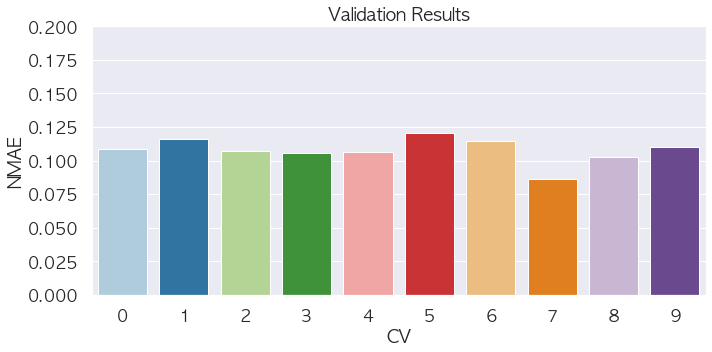

In [340]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
g1 = sns.barplot(x=list(range(len(cv_results['test_score']))), y=cv_results['test_score'], ax = ax, palette="Paired")
g1.set_ylabel('NMAE')
g1.set_xlabel('CV')
g1.set_title('Validation Results')
g1.set(ylim=(0.0, .20))
plt.tight_layout()
plt.show()

In [342]:
print('cv NAME : ', np.mean(cv_nmae))
print('fnl NAME : ', NMAE(y_train, y_pred) )

cv NAME :  0.1077956241834325
fnl NAME :  0.14016171399038324


In [359]:
from sklearn.model_selection import permutation_test_score
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    fnl_model, x_train_fs, y_train, 
    scoring=make_scorer(custom_NMAE, greater_is_better=False), 
    cv=cv, n_permutations=100)

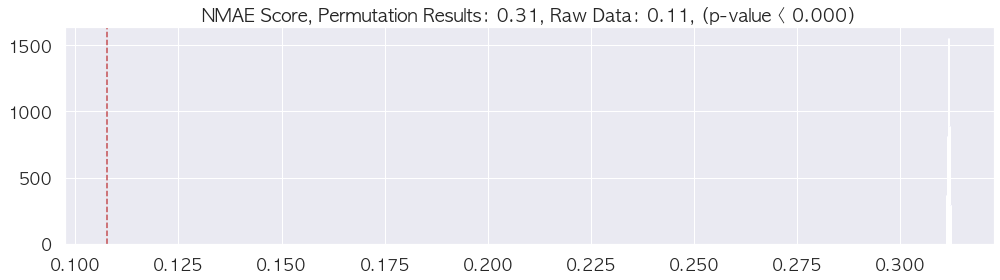

In [361]:
perm_res = pg.ttest(x=perm_scores_act , y =score_act)
plt.subplots(figsize=(14, 4))
plt.hist(perm_scores_act, density=True, color='blue')
plt.axvline(score_act, ls="--", color="r")
score_label = f"NMAE Score, Permutation Results: {np.mean(perm_scores_act):.2f}, Raw Data: {score_act:.2f}, (p-value < {perm_res['p-val'][0]:.3f})"
plt.title(score_label)
plt.tight_layout()
plt.show()

#### Prediction

In [ ]:
y_test = fnl_model.predict(x_test_fs)

 #### Submission

In [367]:
df_sample = pd.read_csv(('%s/sample_submission.csv' % (data_dir)), encoding='euc-kr')

In [373]:
df_sample['target'] = y_test

In [374]:
df_sample

,id,target
0,1,341548.482137
1,2,134874.934120
2,3,178692.095561
3,4,257033.365083
4,5,127729.887617
...,...,...
1345,1346,363570.549113
1346,1347,111128.888659
1347,1348,65372.786985
1348,1349,219078.039721


In [376]:
df_sample.to_csv("submission_1.csv", mode='a', header=True,
                index=False, columns=['id','target'])